ML-RL-task-ev-numbers

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv("/Users/apple/Downloads/SoftwareDefectDataset.csv")

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LOC            1000 non-null   float64
 1   CYCLO          1000 non-null   float64
 2   LENGTH         1000 non-null   float64
 3   VOLUME         1000 non-null   float64
 4   DIFFICULTY     1000 non-null   float64
 5   INT_FAN_IN     1000 non-null   float64
 6   INT_FAN_OUT    1000 non-null   float64
 7   NUM_OPERATORS  1000 non-null   float64
 8   NUM_OPERANDS   1000 non-null   float64
 9   BRANCH_COUNT   1000 non-null   float64
 10  DEFECT_LABEL   1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [37]:
df.describe()

,LOC,CYCLO,LENGTH,VOLUME,DIFFICULTY,INT_FAN_IN,INT_FAN_OUT,NUM_OPERATORS,NUM_OPERANDS,BRANCH_COUNT,DEFECT_LABEL
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.520711,0.493304,0.509783,0.505971,0.502349,0.503556,0.510667,0.493988,0.512625,0.514643,0.326000
std,0.289402,0.301158,0.289705,0.291389,0.284572,0.315975,0.321400,0.295131,0.276572,0.314337,0.468982
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.278720,0.217391,0.255017,0.252619,0.262725,0.222222,0.222222,0.231084,0.280738,0.214286,0.000000
50%,0.531834,0.478261,0.513841,0.522552,0.511328,0.555556,0.555556,0.494888,0.517418,0.571429,0.000000
75%,0.767474,0.739130,0.761678,0.759446,0.750681,0.777778,0.777778,0.756646,0.742828,0.785714,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
df.shape

(1000, 11)

In [39]:
df.isnull().sum()

LOC              0
CYCLO            0
LENGTH           0
VOLUME           0
DIFFICULTY       0
INT_FAN_IN       0
INT_FAN_OUT      0
NUM_OPERATORS    0
NUM_OPERANDS     0
BRANCH_COUNT     0
DEFECT_LABEL     0
dtype: int64

In [40]:
df.duplicated().sum()

np.int64(0)

MDP-State

In [41]:
df = df.dropna()
df["DEFECT_LABEL"] = df["DEFECT_LABEL"].astype(int)

Feature–Target Spli

In [42]:
X = df.drop(columns=['DEFECT_LABEL'])
X.head()

,LOC,CYCLO,LENGTH,VOLUME,DIFFICULTY,INT_FAN_IN,INT_FAN_OUT,NUM_OPERATORS,NUM_OPERANDS,BRANCH_COUNT
0,0.779239,0.478261,0.274048,0.544918,0.564121,0.222222,0.444444,0.736196,0.807377,0.642857
1,0.595156,0.608696,0.742561,0.758597,0.450649,0.222222,0.000000,0.576687,0.200820,0.142857
2,0.895502,0.000000,0.968166,0.754277,0.672996,1.000000,0.000000,0.116564,0.020492,0.000000
3,0.782007,0.565217,0.164706,0.017766,0.584106,0.000000,1.000000,0.615542,0.481557,0.500000
4,0.757785,0.217391,0.560900,0.126125,0.526050,0.555556,0.222222,0.656442,0.655738,0.857143


In [43]:
y = df['DEFECT_LABEL']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: DEFECT_LABEL, dtype: int64

ML Model

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [45]:
X = df.drop(columns=["DEFECT_LABEL"])
y = df["DEFECT_LABEL"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model_train

In [46]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


prediction model in LR

In [47]:
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.705

In [48]:
final_outputs = []

for idx, pred in enumerate(y_pred):
    if idx % 2 == 0:   # EVEN ONLY
        final_outputs.append(pred)

final_outputs[:10]

[np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0)]

In [49]:
rewards = []

for true, pred in zip(y_test.iloc[:len(final_outputs)], final_outputs):
    rewards.append(1 if true == pred else -1)

np.mean(rewards)

np.float64(0.46)

In [53]:
even_indices = [i for i in range(len(y_pred)) if i % 2 == 0]
even_predictions = y_pred[even_indices]
even_indices

[0,
 2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 58,
 60,
 62,
 64,
 66,
 68,
 70,
 72,
 74,
 76,
 78,
 80,
 82,
 84,
 86,
 88,
 90,
 92,
 94,
 96,
 98,
 100,
 102,
 104,
 106,
 108,
 110,
 112,
 114,
 116,
 118,
 120,
 122,
 124,
 126,
 128,
 130,
 132,
 134,
 136,
 138,
 140,
 142,
 144,
 146,
 148,
 150,
 152,
 154,
 156,
 158,
 160,
 162,
 164,
 166,
 168,
 170,
 172,
 174,
 176,
 178,
 180,
 182,
 184,
 186,
 188,
 190,
 192,
 194,
 196,
 198]

In [56]:
even_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

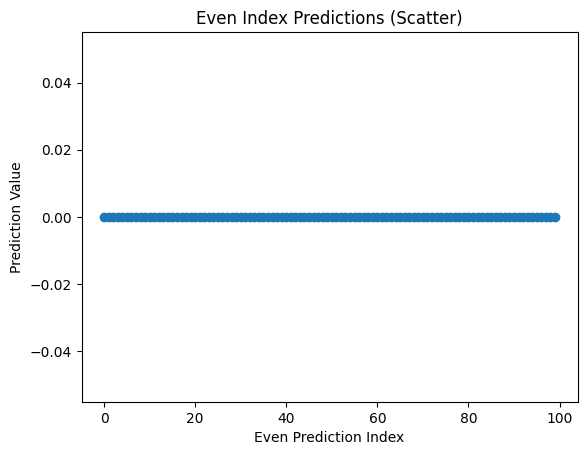

In [52]:
plt.figure()
plt.scatter(range(len(even_predictions)), even_predictions)
plt.title("Even Index Predictions (Scatter)")
plt.xlabel("Even Prediction Index")
plt.ylabel("Prediction Value")
plt.show()